iterations: 100 | alpha: 0.1
-----------------------------------------------------------------------------------------
Itertaion no. 0: cost 2.4952e+04
Itertaion no. 10: cost 7.0072e+03
Itertaion no. 20: cost 5.0411e+03
Itertaion no. 30: cost 4.8030e+03
Itertaion no. 40: cost 4.7739e+03
Itertaion no. 50: cost 4.7703e+03
Itertaion no. 60: cost 4.7698e+03
Itertaion no. 70: cost 4.7698e+03
Itertaion no. 80: cost 4.7698e+03
Itertaion no. 90: cost 4.7698e+03
Itertaion no. 90: cost 4.770e+03
Itertaion no. 91: cost 4.770e+03
Itertaion no. 92: cost 4.770e+03
Itertaion no. 93: cost 4.770e+03
Itertaion no. 94: cost 4.770e+03
Itertaion no. 95: cost 4.770e+03
Itertaion no. 96: cost 4.770e+03
Itertaion no. 97: cost 4.770e+03
Itertaion no. 98: cost 4.770e+03
Itertaion no. 99: cost 4.770e+03
b,w found by gradient descent: -0.37,[[72.99450661 66.24736555 97.43959016  1.7175908  17.36281484 24.81555849
  71.23162987 30.99471656 20.34997943 93.74647297 39.36806608 37.25428984
   2.82788165 40.70113281 4

Text(0, 0.5, 'Cost')

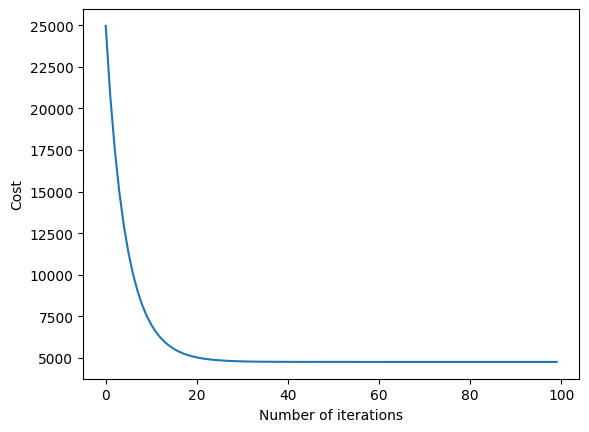

In [5]:
import matplotlib.pyplot as plt
from ml_ai import *
import numpy as np
import pandas as pd

# Extraction of training sets
data = np.loadtxt("./linear_train.csv", delimiter=",", skiprows= 1)
# features = ['size(sqft)','bedrooms','floors','age']
X_train = (data[:, 1:(data.shape[1] - 1)])
y_train = data[:, (data.shape[1] - 1)]

m, n = X_train.shape
#Rescaling
mean = np.mean(X_train, axis=0).reshape(1, n)
sigma = np.std(X_train, axis=0).reshape(1, n)



# for i in range(n):
# #     if np.ptp(X_train[:, i]) > 100:
#     X_train[:, i] = (X_train[:, i] - mean[i])/(sigma[i])
X_train = (X_train - mean)/sigma

X1 = X_train.copy()

# Initialise the parameters
init_w = np.zeros(X_train.shape[1]).reshape(1, n)
init_b = 0.0


num_iter = iterations()
l_rate = alpha()
print(f"iterations: {num_iter} | alpha: {l_rate}")
print("-----------------------------------------------------------------------------------------")
w_f, b_f, recJ = find_wb(X_train, y_train, init_w, init_b, l_rate, num_iter, cal_cost, cal_grad)
print(f"b,w found by gradient descent: {b_f:0.2f},{w_f} ")

# Output
data_test = np.loadtxt('linear_test_data.csv', delimiter=',', skiprows=1)
X_test = (data_test[:, 1:(data.shape[1])])
m1, n1 = X_test.shape

output = []
# for i in range(n1):
#   X_test[:, i]  = (X_test[:, i]- mean[i])/sigma[i]
mean1 = np.mean(X_test, axis=0).reshape(1, n)
sigma1 = np.std(X_test, axis=0).reshape(1, n)



# for i in range(n):
# #     if np.ptp(X_train[:, i]) > 100:
#     X_train[:, i] = (X_train[:, i] - mean[i])/(sigma[i])
X_test = (X_test - mean1)/sigma1

for i in range(m1):
  out_i = cal_out(X_test[i, :], w_f, b_f)
  output.append(out_i)

df = pd.DataFrame(data_test[:, 0])
df['Output'] = output
df.columns = ['ids', 'Output']

print(df)
# df.to_csv("submission.csv")

# Visual Representation

# plt.scatter(X_train[:, 0], y_train, c='r')
# plt.show()
plt.plot(np.arange(num_iter), recJ)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

# plt.scatter(X1[30000:, 0], y_train[30000:], c='b')
# plt.scatter(X1[30000:, 0], np.matmul(X1[30000:, :], w_f.T) + b_f, c='r')

# mean = np.mean(y_train[45000:])
# sum = (np.matmul(X1[45000:, :], w_f.T) + b_f)
# r2 = 1 - (np.sum((sum - y_train[45000:].reshape(5000, 1)) ** 2)/np.sum((sum - mean)**2))

# print(f"R2 Score: {r2}

R2 Score: 0.8162774915538916


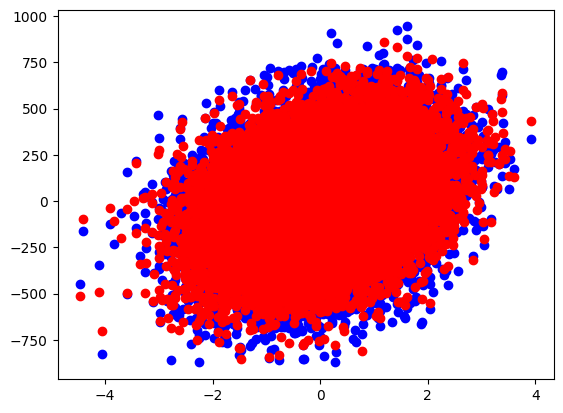

In [7]:
plt.scatter(X1[30000:, 0], y_train[30000:], c='b')
plt.scatter(X1[30000:, 0], np.matmul(X1[30000:, :], w_f.T) + b_f, c='r')

mean = np.mean(y_train[45000:])
y_pred = np.matmul(X1[45000:, :], w_f.T) + b_f
r2 = 1 - (np.sum((y_pred - y_train[45000:].reshape(5000, 1)) ** 2)/np.sum((sum - mean)**2))

print(f"R2 Score: {r2}")

In [4]:
X1.shape

(50000, 20)

In [10]:
from sklearn.metrics import r2_score
y_pred1 = np.matmul(X1[45000:, :], w_f.T) + b_f
r2 = r2_score(y_pred1, y_train[45000:])
print(f"R2 Score: {r2}")

R2 Score: 0.816277296120117


In [6]:
data = np.loadtxt("./linear_train.csv", delimiter=",", skiprows= 1)
# features = ['size(sqft)','bedrooms','floors','age']
X_train1 = (data[:, 1:(data.shape[1] - 1)])
y_train = data[:, (data.shape[1] - 1)]


In [9]:
X_train[0, :]

array([-9.97229965e-01,  1.20760112e+00,  6.47141731e-01,  5.58979636e-02,
       -1.82633253e+00, -1.66062592e+00, -1.97997505e+00,  6.92966534e-01,
        2.45635721e+00,  1.15316986e-03, -2.01506848e+00,  1.17952361e+00,
       -3.21477112e-01,  9.29032750e-01,  9.29032750e-01, -1.65097309e+00,
        7.79641579e-02, -4.23566850e-01,  1.47061762e-01, -1.81833211e+00])

In [26]:
print(cal_out(X_train[16, :], w_f, b_f))  # Testing with the training data for accuracy

259.2096796092941


In [1]:
plt.scatter(X_test[:, 10], y_train, c='b')
plt.plot(X_test[10], (w_f[10]*X_test[10] + b_f), c='r')

NameError: name 'plt' is not defined